In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
missing_values = ['?','--','-','??','.']
df = df.replace(missing_values, np.nan)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df = df.drop('car_ID', axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


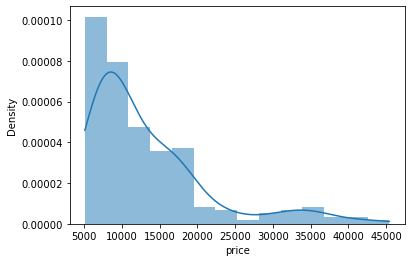

<Figure size 432x288 with 0 Axes>

In [11]:
sns.histplot(df['price'], kde=True, stat="density", linewidth=0)
fig = plt.figure()

In [12]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 1.777678
Kurtosis: 3.051648


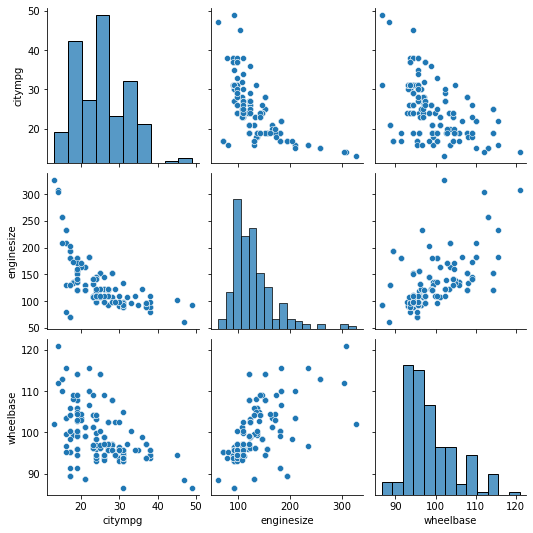

In [13]:
sns.pairplot(df[['citympg', 'enginesize', 'wheelbase']], palette='Set1')

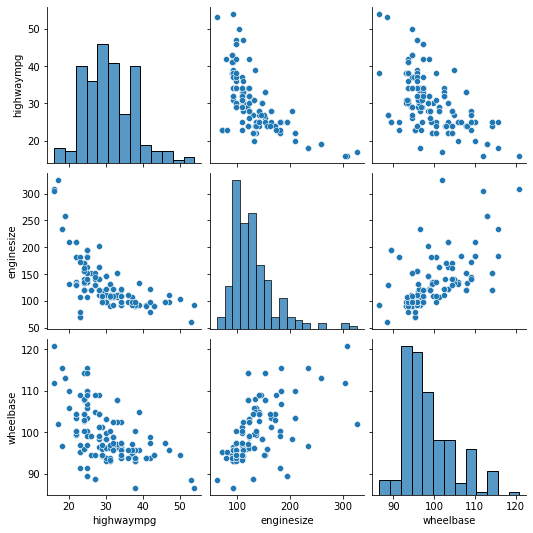

In [14]:
sns.pairplot(df[['highwaympg', 'enginesize', 'wheelbase']], palette='Set1')

In [15]:
fig = px.histogram(df, x="CarName", title='Count of cars based on OEM')
fig.show()

Text(0.5, 1.0, 'Risk factor based on make')

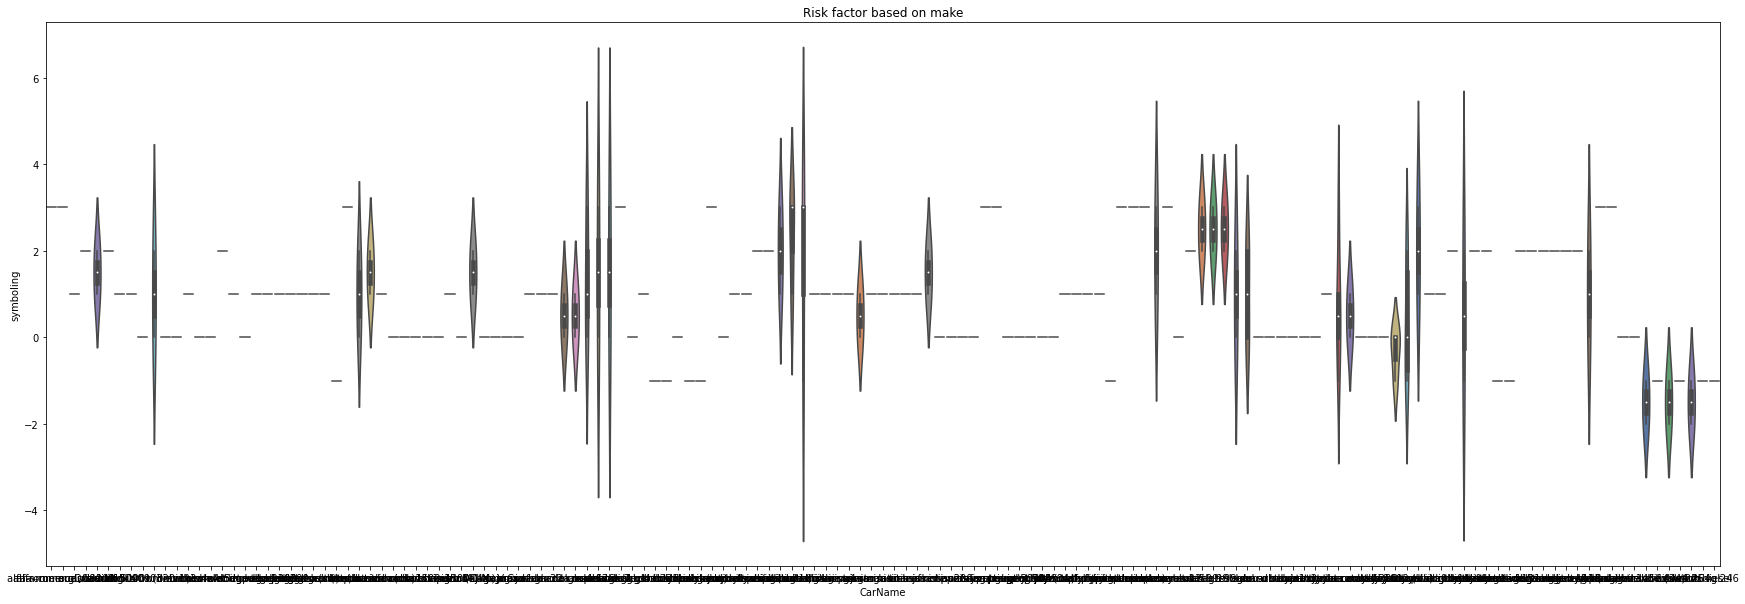

In [16]:
fig, ax = plt.subplots(figsize=(30,10)) 
sns.violinplot(x="CarName", y="symboling", data=df, palette='deep')

plt.title("Risk factor based on make")

In [17]:
label = df["carbody"].unique()
sizes = df["carbody"].value_counts().values

fig_pie1 = go.Figure(data=[go.Pie(labels=label, values=sizes, pull=[0.1, 0, 0, 0])])
fig_pie1.update_layout(title="Car Body Propotion",    
        font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig_pie1.show()

In [18]:
fig_vio1 = px.violin(x = df['carbody'], y = df["price"], box=True, points="all")
# Defining the layout
fig_vio1.update_layout(
    title="Car Body and Price",
    xaxis_title="Car Body",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=18
    ))
fig_vio1.show()

In [19]:
df['horsepower'] = df['horsepower'].astype(int)
df['peakrpm'] = df['peakrpm'].astype(int)

# let's create the new column for torque
df['torque'] = ((df['horsepower'] * 5252) / df['peakrpm'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,torque
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,116.594400
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,116.594400
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,161.761600
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,97.400727
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,109.814545


In [20]:
HP = df['horsepower'].nlargest(10)
HP_Index = [129,49,126,127,128,105,73,74,15,16]
# Extracting the corresponding 10 values from the column 'make'
make_hp = df['CarName'].iloc[HP_Index]

#creating a new dataframe with this values.
data = {'HP': HP, 'Make':make_hp} 
df1 = pd.DataFrame(data) 
df1

,HP,Make
129,288,porsche cayenne
49,262,jaguar xk
126,207,porcshce panamera
127,207,porsche cayenne
128,207,porsche boxter
105,200,nissan kicks
73,184,buick century special
74,184,buick regal sport coupe (turbo)
15,182,bmw x4
16,182,bmw x5


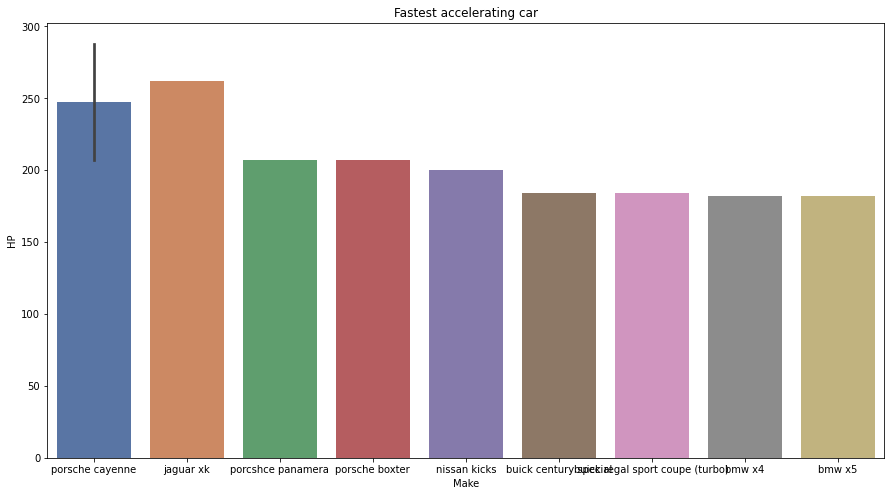

In [21]:
plt.subplots(figsize=(15,8))
ax = sns.barplot(x="Make", y="HP", data=df1, palette='deep')
ax.set_xlabel("Make")
ax.set_ylabel("HP")
ax.set_title("Fastest accelerating car");

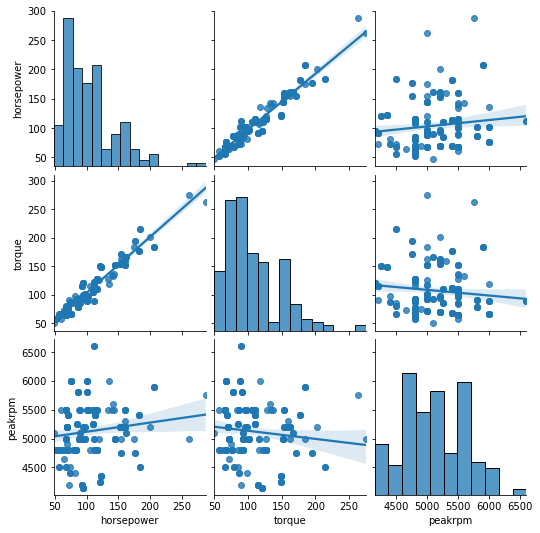

In [22]:
sns.pairplot(df[['horsepower','torque','peakrpm']], palette='Set1', kind="reg")

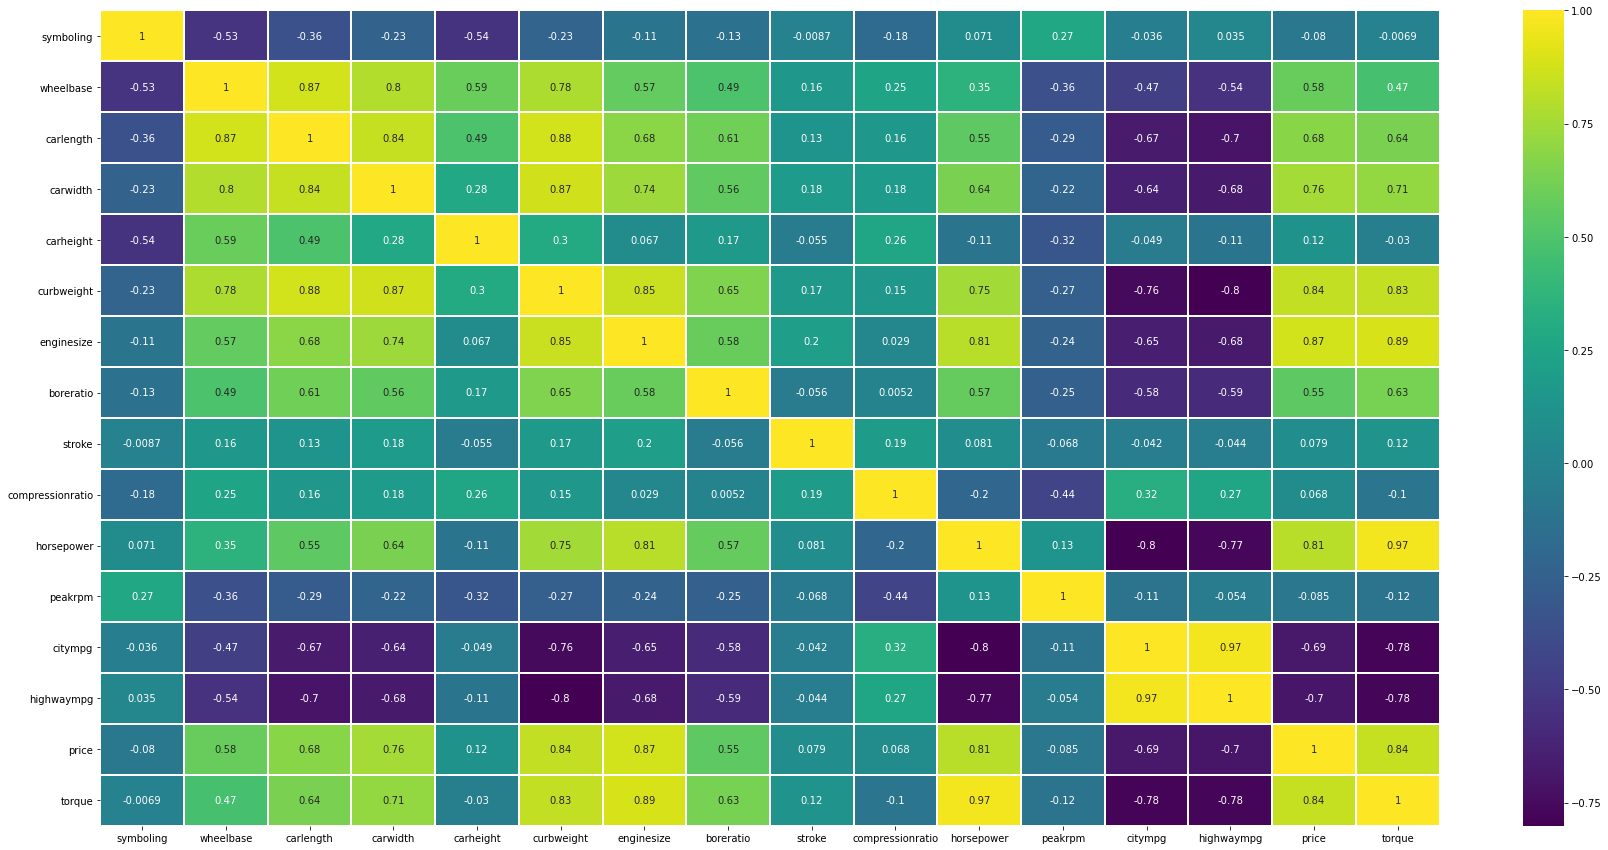

In [23]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linecolor='white',linewidths=1);

In [24]:
comb_mpg = ((df['highwaympg'] * 0.4) + (df['citympg'] * 0.55))
data1 = {'comb-mpg':comb_mpg, 'CarName':df['CarName'], 'fuel-type':df['fueltype']}

df2 = pd.DataFrame(data1)

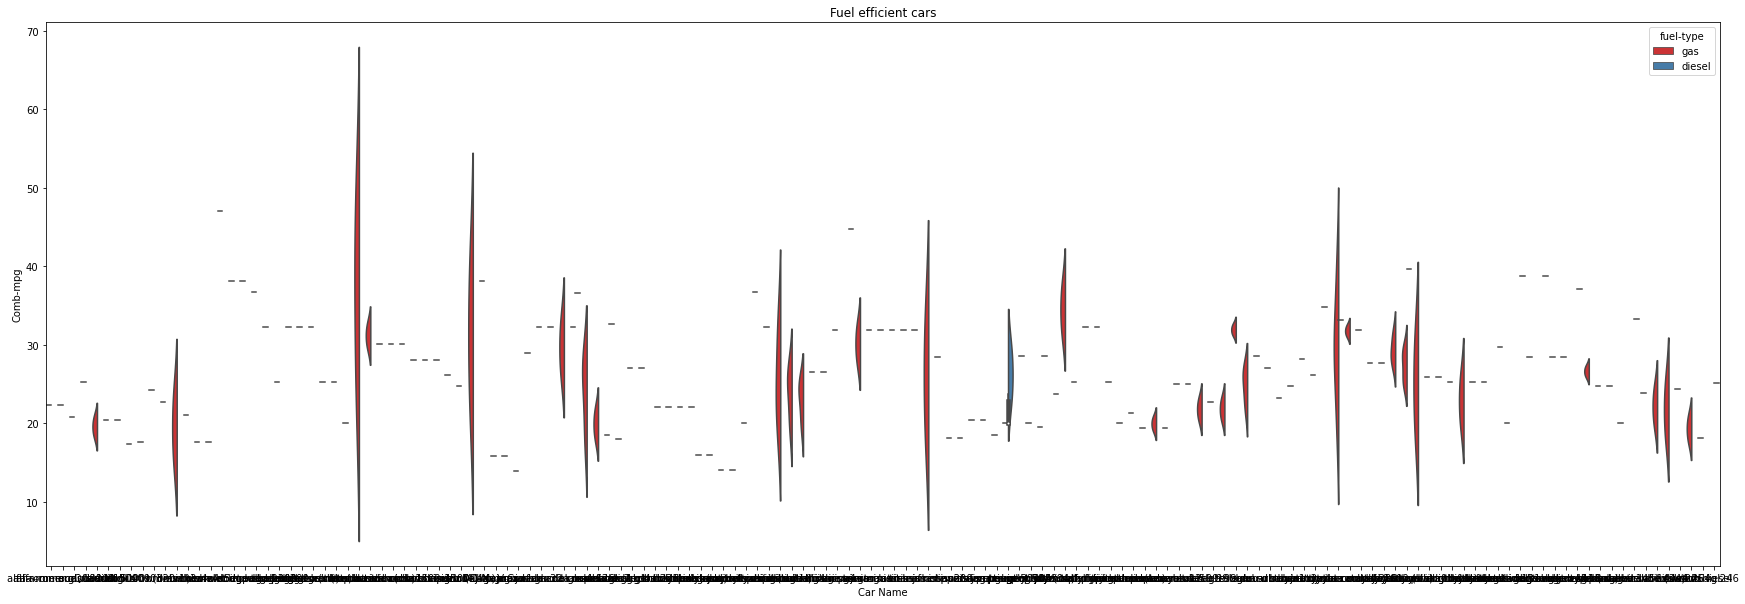

In [25]:
plt.subplots(figsize=(30,10))
vx = sns.violinplot(x="CarName", y="comb-mpg", data=df2,hue='fuel-type',split=True,palette='Set1')
vx.set_xlabel("Car Name")
vx.set_ylabel("Comb-mpg")
vx.set_title("Fuel efficient cars");

In [26]:
fig = px.violin(df, y="price", x="drivewheel", box=True, points="all", 
                color='fueltype', hover_data=df.columns)
fig.show()

In [27]:
fuel_type = pd.get_dummies(df['fueltype'], drop_first=True) 

drive_wheels = pd.get_dummies(df['drivewheel'], drop_first=True) 

engine_location = pd.get_dummies(df['enginelocation'], drop_first=True) 

aspiration = pd.get_dummies(df['aspiration'], drop_first=True) 

In [28]:
df.drop(['fueltype','drivewheel','enginelocation', 'aspiration'],axis=1,inplace=True)

In [29]:
df_df = pd.concat([df,fuel_type,drive_wheels,engine_location, aspiration], axis=1)

In [30]:
# df_df['normalized-losses'] = df_df['normalized-losses'].astype(float)
df_df['boreratio'] = df_df['boreratio'].astype(float)
df_df['stroke'] = df_df['stroke'].astype(float)
df_df['price'] = df_df['price'].astype(float)

In [31]:
df_df.select_dtypes(include='object').head()

,CarName,doornumber,carbody,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,two,convertible,dohc,four,mpfi
1,alfa-romero stelvio,two,convertible,dohc,four,mpfi
2,alfa-romero Quadrifoglio,two,hatchback,ohcv,six,mpfi
3,audi 100 ls,four,sedan,ohc,four,mpfi
4,audi 100ls,four,sedan,ohc,five,mpfi


In [32]:
df_df.drop(['CarName','carbody','enginetype','cylindernumber', 'fuelsystem'],axis=1,inplace=True)

In [33]:
df_clean = pd.concat([df_df],axis=1)

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
symboling           205 non-null int64
doornumber          205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int32
peakrpm             205 non-null int32
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
torque              205 non-null float64
gas                 205 non-null uint8
fwd                 205 non-null uint8
rwd                 205 non-null uint8
rear                205 non-null uint8
turbo               205 non-null uint8
dtypes: float64(9)

In [54]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [55]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [56]:
y.mean()

13276.710570731706

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
print("y intercept is :", lm.intercept_)
print("coefficients are :", lm.coef_)

y intercept is : -62288.18423830846
coefficients are : [ 1.70876493e+02  5.21200860e-11  3.93465314e+01 -7.62431187e+00
  8.78958415e+02  2.11388969e+02  3.78804745e-01  1.09522962e+02
 -2.61186571e+03 -2.96850361e+03 -4.49596264e+02 -2.62453304e+01
  3.20744593e+00 -2.56630080e+02  2.53896415e+02  4.15003974e+01
 -8.54526625e+03 -1.22118935e+03  1.03534141e+03  1.07680292e+04
  4.50906965e+02]


In [41]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
symboling,1.708765e+02
doornumber,5.212009e-11
wheelbase,3.934653e+01
carlength,-7.624312e+00
carwidth,8.789584e+02
carheight,2.113890e+02
curbweight,3.788047e-01
enginesize,1.095230e+02
boreratio,-2.611866e+03
stroke,-2.968504e+03


In [42]:
predictions = lm.predict(X_test)
predictions

array([ 9129.9606842 ,  6212.30586307, 10734.26883497,  6766.96791871,
        8317.06936658, 10321.81297173, 10579.41251293,  8563.71635992,
       10416.00956572, 18414.88867973,  8479.81894713, 24774.89899393,
        8547.04895116, 19451.39322494,  8193.05701847, 10608.49547871,
       14447.2396521 , 16238.62908353, 13730.98020767, 12555.79031661,
       19389.30519035, 29425.52693172, 12028.98728353,  6907.99755101,
       19451.39322494, 14959.20156729,  5480.86446292,  5961.08627957,
       10459.98305969, 19260.44872476,  6490.35007433,  8267.42365895,
       38478.69700661,  9466.36437865, 10430.7885503 ,  9670.43243569,
       21485.43934115, 10389.40170989,  7321.2738985 , 16003.95394955,
       14228.28398294])

In [43]:
y_test

56     11845.0
151     6338.0
149    11694.0
153     6918.0
140     7603.0
186     8495.0
148     8013.0
177    11248.0
100     9549.0
14     24565.0
23      7957.0
67     25552.0
175     9988.0
112    16900.0
35      7295.0
60      8495.0
66     18344.0
65     18280.0
169     9989.0
165     9298.0
103    13499.0
48     35550.0
63     10795.0
138     5118.0
116    17950.0
191    13295.0
32      5399.0
45      8916.5
184     7995.0
113    16695.0
89      5499.0
141     7126.0
74     45400.0
187     9495.0
123     8921.0
85      6989.0
179    15998.0
59      8845.0
43      6785.0
4      17450.0
83     14869.0
Name: price, dtype: float64

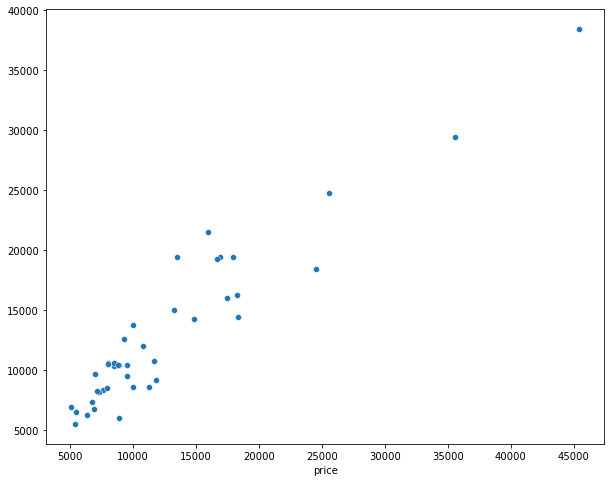

In [44]:
plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x=y_test, y=predictions,
                    sizes=(20, 200), legend="full", palette="Set2")

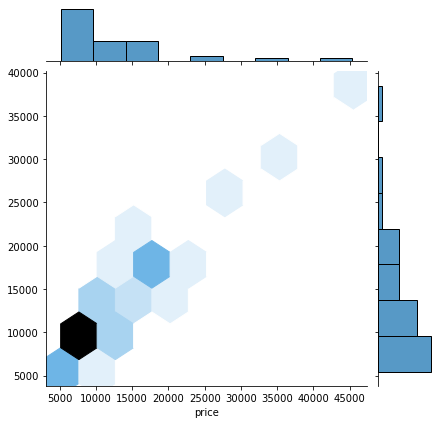

In [45]:
sns.jointplot(x=y_test,y=predictions,kind='hex')

<AxesSubplot:xlabel='price', ylabel='Density'>

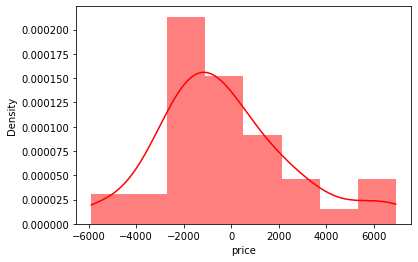

In [46]:
pred_error = y_test - predictions
sns.histplot(pred_error, color="red", kde=True, stat="density", linewidth=0)

In [47]:
X_endog = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_endog).fit()

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [48]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.93
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.09e-55
Time:                        00:27:06   Log-Likelihood:                -1532.3
No. Observations:                 164   AIC:                             3107.
Df Residuals:                     143   BIC:                             3172.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.229e+04   2.34e+04     -2.663      0.009   -1.09e+05   -1.61e+04
symboling          170.8765    256.426      0.666      0.506    -335.999     677.752
doornumber        4.864e-08   1.82e-08      2.670      0.008    1.26e-08    8.46e-08
wheelbase           39.3465    128.437      0.306      0.760    -214.534     293.227
carlength           -7.6243     62.205     -0.123      0.903    -130.584     115.335
carwidth           878.9584    271.893      3.233      0.002     341.509    1416.407
carheight          211.3890    159.937      1.322      0.188    -104.758     527.536
curbweight           0.3788      2.097      0.181      0.857      -3.766       4.524
enginesize         109.5230     22.100      4.956      0.000      65.837     153.209
boreratio        -2611.8657   1320.988     -1.977      0.050   -5223.053      -0.679
stroke           -2968.5036    965.848     -3.073      0.003   -4877.687   -1059.320
compressionratio  -449.5963    505.420     -0.890      0.375   -1448.656     549.464
horsepower         -26.2453    104.301     -0.252      0.802    -232.416     179.925
peakrpm              3.2074      2.219      1.446      0.150      -1.178       7.593
citympg           -256.6301    205.751     -1.247      0.214    -663.336     150.076
highwaympg         253.8964    188.048      1.350      0.179    -117.817     625.610
torque              41.5004    111.935      0.371      0.711    -179.760     262.761
gas              -8545.2663   7212.799     -1.185      0.238   -2.28e+04    5712.217
fwd              -1221.1893   1627.238     -0.750      0.454   -4437.739    1995.360
rwd               1035.3414   1647.015      0.629      0.531   -2220.301    4290.984
rear              1.077e+04   2509.018      4.292      0.000    5808.472    1.57e+04
turbo              450.9070   1127.522      0.400      0.690   -1777.856    2679.670
==============================================================================
Omnibus:                       44.692   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.304
Skew:                           0.984   Prob(JB):                     9.40e-36
Kurtosis:                       7.442   Cond. No.                     9.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.41e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
print(ls.pvalues)

const               0.008627
symboling           0.506244
doornumber          0.008460
wheelbase           0.759785
carlength           0.902621
carwidth            0.001522
carheight           0.188379
curbweight          0.856896
enginesize          0.000002
boreratio           0.049941
stroke              0.002534
compressionratio    0.375202
horsepower          0.801687
peakrpm             0.150468
citympg             0.214332
highwaympg          0.179096
torque              0.711369
gas                 0.238087
fwd                 0.454206
rwd                 0.530603
rear                0.000032
turbo               0.689820
dtype: float64


In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2 Score:', metrics.r2_score(y_test, predictions))

MAE: 2175.677873010139
MSE: 7842702.5639038235
RMSE: 2800.4825591143795
R^2 Score: 0.8786807690003136
